### Analyzing Ford GoBike data. 
Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. 
After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019.
 https://www.fordgobike.com/system-data

About dataset:  
Ford Gobike system data : https://www.fordgobike.com/system-data is choosen as the source data, This dataset has information regarding the individual rides made in a bike-sharing system.Multiple data files will need to be joined together if a full year’s coverage is desired.   
The company has seen an acquisition by mid of 2019, so we will be exploring the Ford GoBike data for the year 2019, to gain some insights from several observation. 

### Major questions to be answered?

1. Find the time period where campaigns should be satrted to attract more customers to subsribe to the application?
2. Proportion of the customers using application, does the subscribers prefer using application or clipper for renting bikes.
3. Analyze the surge hours during a day, so that we need to ensure that customers are met with the need.
4. Customer target: Is there a specific customer target to be generated, like tourists, whitescholors etc.
5. Is the new feature bikeshare a success, discuss the effort needed to attarct more customers to bike share plan

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from requests import get
import os
import glob
import requests
from io import BytesIO
from zipfile import ZipFile
import matplotlib.ticker as tick
import datetime
import math
import calendar

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
import pandas.util.testing as tm

C:\Users\sibin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1. Data Collection
Here we wil be gathering the data to be used, since the data is continously updated, we will make a copy of the data so that we can maintain continous result

In [ ]:
#Creating the file we'll be storing our data in
os.makedirs('ford-gobike-trip-data')

In [ ]:
# downloading year 2019 files.
urls = ['https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip']
for url in urls:
    response = requests.get(url)
    zip_file = ZipFile(BytesIO(response.content))
    zip_file.extractall('ford_bike_data')


In [2]:
#store list of all file locations
path = r'ford_bike_data'
all_data = glob.glob(os.path.join(path, "*.csv"))


In [3]:
#loading and concatinating all the csv files in 'all_data'
df = pd.concat((pd.read_csv(f) for f in all_data), ignore_index = True)

In [7]:
# saving the datafile generated to a master dataframe
df.to_csv("fordbike2019.csv", index = False)

In [4]:
#we will be working on a copy of this data, so that we wont alter the master file 
data = pd.read_csv('fordbike2019.csv')

### 2. Data Assesment

In [5]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [10]:
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [12]:
data.rental_access_method.value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

In [13]:
data.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

In [14]:
data.bike_share_for_all_trip.value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [15]:
type(data['start_time'][0])

str

In [16]:
data.duplicated().sum()

0

In [17]:
data.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64


#### Quality Issues
    
    start_time and end_time are strings
    We could generate month, week from the above variable
    user_type , bike_share_for_all_trip, rental_access_method  can be converted to categorical variable
    bike id, start_station_id, end_station_id can be set as object
    Missing starting station names

### 3. Cleaning data

In [18]:
#create copy of original dataframe
data_clean = data.copy()


##### Define
Remove rows with missing start station name as we will be working more with start station data

In [19]:
# Code
data_clean = data_clean[pd.notnull(data_clean['start_station_name'])]

In [20]:
# Test
data_clean.start_station_name.isnull().sum()

0

##### Define
Changing datatypes of data as specified
##### Code

In [21]:
# set start_time and end_time to timestamps
data_clean.start_time = pd.to_datetime(data_clean.start_time)
data_clean.end_time = pd.to_datetime(data_clean.end_time)

In [22]:
# set user type, rental access method and bike_share_for_all_trip to category
data_clean.user_type = data_clean.user_type.astype('category')
data_clean.rental_access_method = data_clean.rental_access_method.astype('category')
data_clean.bike_share_for_all_trip = data_clean.bike_share_for_all_trip.astype('category')

In [23]:
# set bike id, start_station_id, end_station_id to object
data_clean.bike_id = data_clean.bike_id.astype(str)
data_clean.start_station_id = data_clean.bike_id.astype(str)
data_clean.end_station_id = data_clean.bike_id.astype(str)

##### Test

In [24]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2426850 entries, 0 to 2506660
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     category      
dtypes: category(3), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 247.6+ MB


##### Define:
Extract and create new columns Month name,Month ,Weekday ,Day of the week and hour from start_time column

In [25]:
# extract month name from start_time column 
data_clean['st_month_name']=data_clean['start_time'].dt.strftime('%B')

# extract month number from start_time column
data_clean['st_month']=data_clean['start_time'].dt.month.astype(int)

# extract weekdays from start_time column
data_clean['st_weekday']=data_clean['start_time'].dt.strftime('%a')

# extract day from start_time column
data_clean['st_day']=data_clean['start_time'].dt.day.astype(int)

# extract hour from start_time column
data_clean['st_hour']=data_clean['start_time'].dt.hour

##### Test

In [26]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2426850 entries, 0 to 2506660
Data columns (total 20 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     category      
 15  st_month_name            object        
 16  st_month                 int32         
 17  st_weekday               ob

In [27]:
# saving cleaned data 
# save cleaned data 
data_clean.to_csv('BikeCleaned_data.csv', index=False)

### 4: Univariate Exploration:
Here we will look at the variables such as monthly data, weekly data, distribution of duration, proportion of members who are subscribers

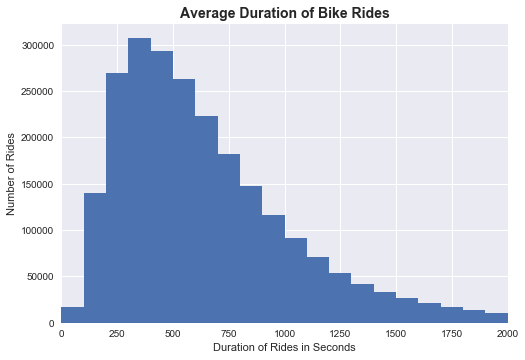

In [180]:
#Visualizing the data in a histogram
duration_bins = np.arange(0, data_clean['duration_sec'].max() + 100, 100)
plt.hist(data = data_clean, x = 'duration_sec', bins = duration_bins);

plt.xlim(0, 2000);
plt.title('');
plt.title('Average Duration of Bike Rides', fontsize=14, fontweight='semibold');
plt.xlabel('Duration of Rides in Seconds');
plt.ylabel('Number of Rides');


    Duration of ride is rightly skewed, where most of the rides are for shorter period

In [183]:
# Frequency of users
customer = data_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = data_clean.query('user_type == "Subscriber"')['bike_id'].count()
customer_proportion = customer / data_clean['bike_id'].count()
subscriber_proportion = subscriber / data_clean['bike_id'].count()

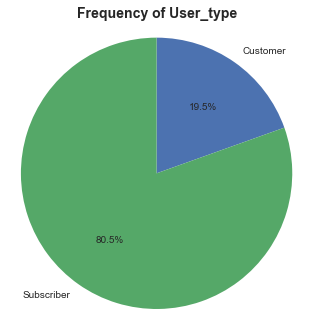

In [188]:
# Frequency of users
labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
plt.pie(sizes,labels = labels, startangle = 90,autopct='%1.1f%%',
        counterclock = False);
plt.axis('square');
plt.title('Frequency of User_type', fontsize=14, fontweight='semibold');

    80.50% of the members are subscribers, the rest 19.50% are the normal customers.

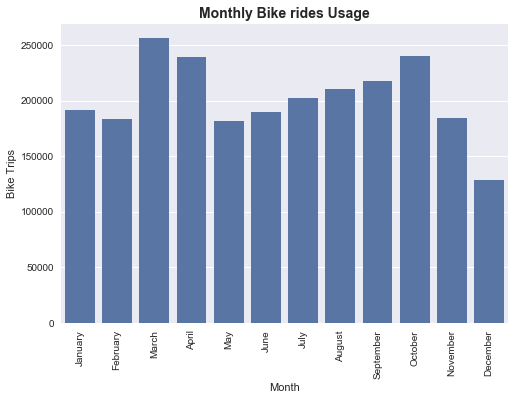

In [60]:
# Monthly Bike rides Usage
basecolor = sns.color_palette()[0]
sns.countplot(data=data_clean, x='st_month_name', color= basecolor)
plt.xlabel("Month")
plt.ylabel("Bike Trips")
plt.title('Monthly Bike rides Usage', fontsize=14, fontweight='semibold');
plt.xticks(rotation = 90);

    Month of march, april and october see a higher number of bike rides

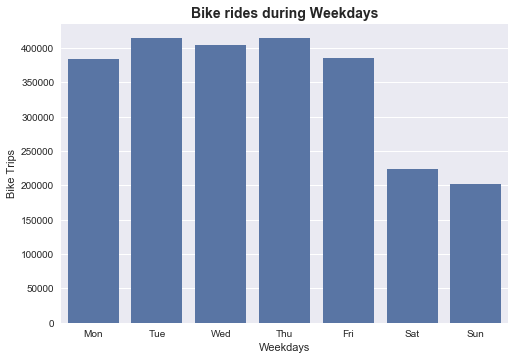

In [61]:
# Bike rides during Weekdays
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
basecolor = sns.color_palette()[0]
sns.countplot(data=data_clean, x='st_weekday', color = basecolor, order = weekday)
plt.xlabel("Weekdays")
plt.ylabel("Bike Trips")
plt.title('Bike rides during Weekdays', fontsize=14, fontweight='semibold');

    Bike rides are mostly opted on weekdays, whereas in weekends the total rides gets halfed. Working population relying on the bike rides can be a reason. 

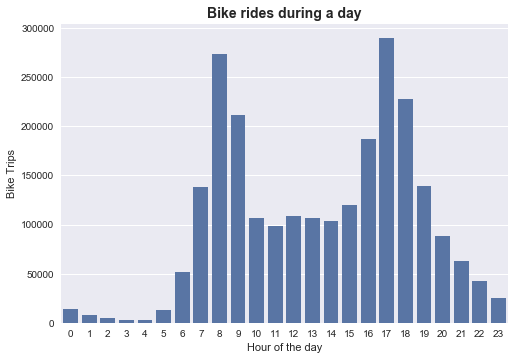

In [58]:
# Bike rides during a day
basecolor = sns.color_palette()[0]
sns.countplot(data=data_clean, x='st_hour', color = basecolor)
plt.xlabel("Hour of the day")
plt.ylabel("Bike Trips")
plt.title('Bike rides during a day', fontsize=14, fontweight='semibold');

    Bike rides are at its peak in morning and evening, especialy by the time 8 am and 5 pm ride is at its surge

### 5. Bivariate exploration

Here we will be maily focusing on usertype. There are two type of users, 1. Subscribers 2. Customers.
and average rides made in a month, we will see the trend, 

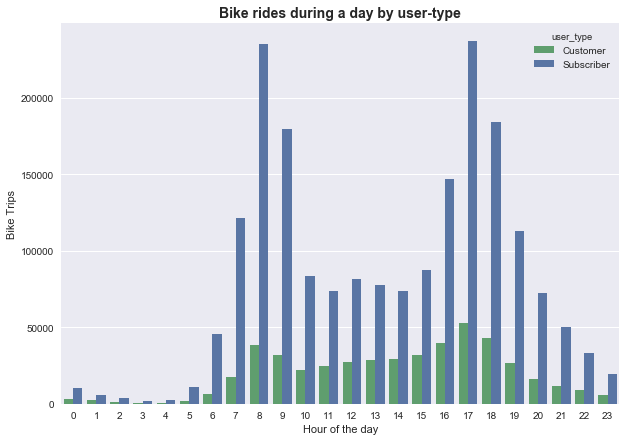

In [192]:
# Bike rides during a day by user-type
plt.figure(figsize = (10, 7))
basecolor = sns.color_palette()[0]
palette ={"Subscriber":"C0","Customer":"C1"}
sns.countplot(data=data_clean, x='st_hour',hue = 'user_type', color = basecolor, palette=palette)
plt.xlabel("Hour of the day")
plt.ylabel("Bike Trips")
plt.title('Bike rides during a day by user-type', fontsize=14, fontweight='semibold');

    As we know subscribers are in higher number than the customers, but in this graph we can see that, during the hour of the day, their proportion remains the same. When subscribers increases usage, so as customers do.

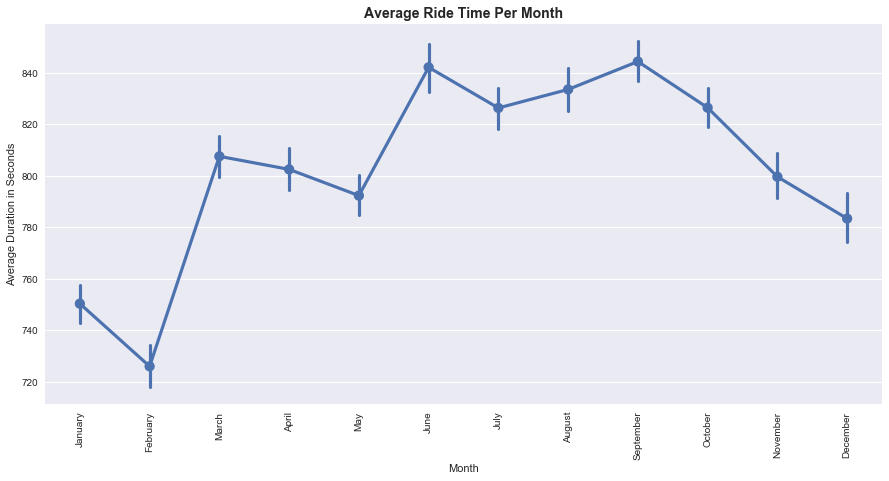

In [193]:
#Average Ride Time per Month
#Visualizing the data in a point plot
plt.figure(figsize = (15, 7))
sns.pointplot(data = data_clean, x = 'st_month_name', y = 'duration_sec');
plt.xticks(rotation = 90);
plt.title('Average Ride Time Per Month', fontsize=14, fontweight='semibold');
plt.ylabel('Average Duration in Seconds');
plt.xlabel('Month');
plt.style.use('seaborn')

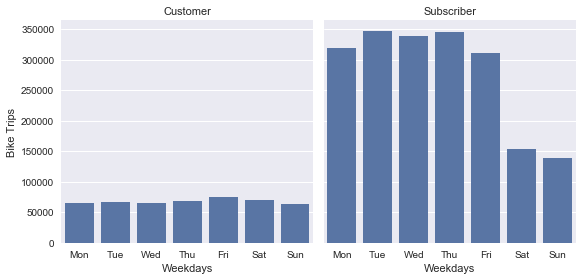

In [198]:
# User_type based on weekday bike usage
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.FacetGrid(data = data_clean, col = 'user_type', size = 4 )
g.map(sns.countplot, "st_weekday", order = weekday);


g.set_titles('{col_name}')
g.set_axis_labels("Weekdays", "Bike Trips")



    No of bike rides booked by customers remain same through out the week, whereas subscribers using bikes see a high usage during the weekends

### Multivariate Exploration

In [199]:
#Subscribers monthly bike rides by bike share

In [128]:
subscriber_data = data_clean[data_clean['user_type'] == 'Subscriber'].groupby(['st_month', 'bike_share_for_all_trip']).agg({'bike_id':'count'}).reset_index()

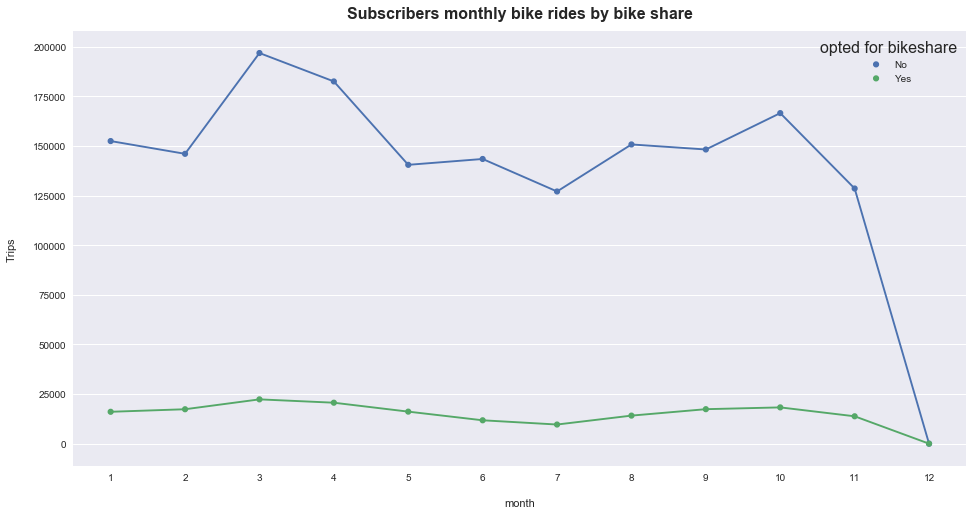

In [134]:

plt.figure(figsize=(16,8))
ax = sns.pointplot(x='st_month', y='bike_id', hue='bike_share_for_all_trip', scale=.6, data=subscriber_data)
plt.title("Subscribers monthly bike rides by bike share", fontsize=16, y=1.015,fontweight='semibold')
plt.xlabel('month', labelpad=16)
plt.ylabel('Trips', labelpad=16)
leg = ax.legend()
leg.set_title('opted for bikeshare',prop={'size':16})
ax = plt.gca()


In [130]:
x = data_clean[data_clean['st_month'] == 12]

In [131]:
x.bike_share_for_all_trip.value_counts()

Yes    0
No     0
Name: bike_share_for_all_trip, dtype: int64

    Company tends to obtain more subscribers during the month of march. Bike sahre data for december can't be plotted as it is missing 

In [170]:
rental_data = data_clean.groupby(['user_type','rental_access_method']).agg({'bike_id':'count'}).reset_index()

In [174]:
rental_data.user_type

'Customer'

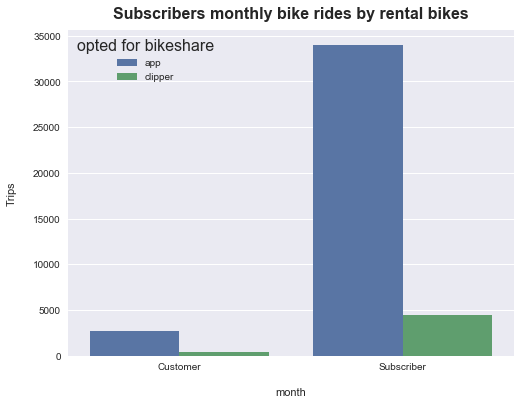

In [178]:
#
plt.figure(figsize=(8,6))
ax = sns.barplot(x='user_type', y='bike_id', hue='rental_access_method', data=rental_data)
plt.title("Subscribers monthly bike rides by rental bikes", fontsize=16, y=1.015,fontweight='semibold')
plt.xlabel('month', labelpad=16)
plt.ylabel('Trips', labelpad=16)
leg = ax.legend()
leg.set_title('opted for bikeshare',prop={'size':16})
ax = plt.gca()

    The application is mainly used by the subscribers, customers tend to avoid the usage of clippers.

## Conclusion

For data analysis I consider 2019 Ford Gobike data, the data had 2506983 entries.
Features:  
The data had features like user type, which share details about the type of user, whether they are subscribed or just random customers accessing bike usage. 
The data also had features like type of bike access, whether by app or clipper, company also provide an offer of bike share, a plan where users gets 24/7 bike usage with annual fee of $5. 

Major questions to be answered:  
    1. Find the time period where campaigns should be started to attract more customers to subsribe to the application?  
    2. Proportion of the customers using application, does the subscribers prefer using application or clipper for renting bikes.
    3. Analyze the surge hours during a day, so that we need to ensure that customers are met with the need.  
    4. Customer target: Is there a specific customer target to be generated, like tourists, whitescholors etc.  
    5. Is the new feature bikeshare a success, discuss the effort needed to attarct more customers to bike share plan.  

These questions are answered using exploratory analysis:

##### Univariate exploration:
From 'month bike ride usage' we could see that number of customers using the bikes see an increase during march and april, so this is the time we could start campaigns to attract more customers to bike usage. This graph answers our first question about the time period during an year where campaigns to be initiated.
Univariate analysis also discuss about bike rides during week in 'Bike rides during Weekdays' plot, where we could see bike usage is heavy during weekends whereas usage reduce to half during weekends 

##### Bivariate exploration:
'Bike rides during a day by user-type' analyze the surge hours during a day for bike usage and finds the answer for the third question, it can be seen that from 7am to 10 am and 4 pm to 7 pm we see a surge in bike usage.
Comparing it to the plot 'User_type based on weekday bike usage' we could say office hours or whitescholors are our major customer target, as we could see that during weekdays we have more of the subsribers using bikes, and they can be working profesionals.

##### Multivariate exploration:
'Subscribers monthly bike rides by rental bikes', shows us subscribers prefer using application, which is good, usage of clipper is said to be low in both the type of users.
'Subscribers monthly bike rides by bike share' plot shows that most of the subscribers haven't opted for share bikes plan. So this plan needs improvement as throughout the year the users remained the same. 